In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"herutriana","key":"88107ea2353190c212bc946f7b23c91f"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d aditibane/skindiseasedataset

 87% 73.0M/83.6M [00:03<00:00, 17.2MB/s]
100% 83.6M/83.6M [00:03<00:00, 24.1MB/s]


In [5]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import zipfile,os
zip_lcl = '/content/skindiseasedataset.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/tmp')
rzip.close()
 
dirbase = '/tmp'

In [7]:
os.listdir('/tmp/dataset')

['Severe', 'Mild', 'Medium']

In [8]:
dir = os.path.join(dirbase,'dataset')

In [9]:
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.2,
    fill_mode='nearest')

In [10]:
generator_latih = data_generator.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=15,
    subset='training',
    class_mode='categorical')
generator_valid = data_generator.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=15,
    subset='validation',
    class_mode='categorical')

Found 740 images belonging to 3 classes.
Found 183 images belonging to 3 classes.


In [11]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(512,activation='relu'),
  tensor.keras.layers.Dense(3,activation='softmax')
  ])

In [12]:
model.compile(loss='categorical_crossentropy',optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [15]:
history = model.fit(
    generator_latih,
    steps_per_epoch=15,
    epochs=50,
    validation_data=generator_valid,
    validation_steps=5,
    verbose=2,
    callbacks=[cekmodel])

Epoch 1/50

Epoch 1: val_accuracy did not improve from 0.58667
15/15 - 20s - loss: 0.7880 - accuracy: 0.6372 - val_loss: 1.0465 - val_accuracy: 0.5333 - 20s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.58667
15/15 - 20s - loss: 0.9458 - accuracy: 0.5860 - val_loss: 0.9994 - val_accuracy: 0.5200 - 20s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.58667
15/15 - 20s - loss: 0.8646 - accuracy: 0.6533 - val_loss: 0.9381 - val_accuracy: 0.5733 - 20s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.58667
15/15 - 20s - loss: 0.7517 - accuracy: 0.6558 - val_loss: 0.9306 - val_accuracy: 0.5467 - 20s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.58667 to 0.66667, saving model to model.hdf5
15/15 - 23s - loss: 0.7507 - accuracy: 0.6489 - val_loss: 0.7436 - val_accuracy: 0.6667 - 23s/epoch - 2s/step
Epoch 6/50

Epoch 6: val_accuracy did not improve from 0.66667
15/15 - 21s - loss: 0.7184 - accuracy: 0

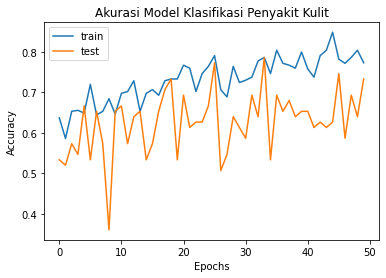

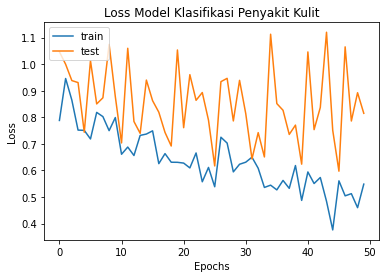

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model Klasifikasi Penyakit Kulit')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model Klasifikasi Penyakit Kulit')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
model.compile(loss='categorical_crossentropy',optimizer=tensor.optimizers.Adam(),
              metrics=[tensor.keras.metrics.Precision()])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_precision',mode='max',verbose=1,save_best_only=True)

In [ ]:
history = model.fit(
    generator_latih,
    steps_per_epoch=15,
    epochs=50,
    validation_data=generator_valid,
    validation_steps=5,
    verbose=2,
    callbacks=[cekmodel])

Epoch 1/50

Epoch 1: val_precision improved from -inf to 0.60000, saving model to model.hdf5
15/15 - 22s - loss: 0.3557 - precision: 0.8692 - val_loss: 1.4300 - val_precision: 0.6000 - 22s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_precision did not improve from 0.60000
15/15 - 20s - loss: 0.4700 - precision: 0.8458 - val_loss: 1.3593 - val_precision: 0.5692 - 20s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_precision improved from 0.60000 to 0.65152, saving model to model.hdf5
15/15 - 20s - loss: 0.5686 - precision: 0.7783 - val_loss: 1.3115 - val_precision: 0.6515 - 20s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_precision did not improve from 0.65152
15/15 - 22s - loss: 0.5647 - precision: 0.8000 - val_loss: 1.1284 - val_precision: 0.5909 - 22s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_precision improved from 0.65152 to 0.68852, saving model to model.hdf5


In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model Klasifikasi Penyakit Kulit')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model Klasifikasi Penyakit Kulit')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

{'accuracy': [0.6372092962265015,
  0.5860465168952942,
  0.653333306312561,
  0.6558139324188232,
  0.648888885974884,
  0.7200000286102295,
  0.644444465637207,
  0.653333306312561,
  0.6844444274902344,
  0.6465116143226624,
  0.6977777481079102,
  0.7022222280502319,
  0.7288888692855835,
  0.653333306312561,
  0.6977777481079102,
  0.7069767713546753,
  0.6930232644081116,
  0.7288888692855835,
  0.7333333492279053,
  0.7333333492279053,
  0.7674418687820435,
  0.7599999904632568,
  0.7022222280502319,
  0.746666669845581,
  0.7644444704055786,
  0.7911111116409302,
  0.7066666483879089,
  0.6888889074325562,
  0.7644444704055786,
  0.7244444489479065,
  0.7302325367927551,
  0.7377777695655823,
  0.7777777910232544,
  0.7866666913032532,
  0.746666669845581,
  0.804444432258606,
  0.7720929980278015,
  0.7674418687820435,
  0.7599999904632568,
  0.800000011920929,
  0.7581395506858826,
  0.7377777695655823,
  0.7911111116409302,
  0.804444432258606,
  0.8488888740539551,
  0.7822

In [ ]:
pengubah = tensor.lite.TFLiteConverter.from_keras_model(model)
tflite_model = pengubah.convert()

INFO:tensorflow:Assets written to: /tmp/tmpnoid25ho/assets


In [ ]:
with tensor.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save('model.pb') 
%cd

INFO:tensorflow:Assets written to: model.pb/assets


INFO:tensorflow:Assets written to: model.pb/assets


/root
